In [66]:
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy as np

In [44]:
with open('C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/datasets/categories/allFiles/appliances.json', 'r') as f:
    data = json.load(f)
# data[0]['reviews']

In [45]:
topics = []
for index in range(len(data)):
    for i in range(len(data[index]['reviews'])):
        for j in range(len(data[index]["reviews"][i]['review_topics'])):
            topics.append(data[index]["reviews"][i]['review_topics'][j])
# topics

In [46]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().lower())  # Convert to lowercase for consistency
    return synonyms

# syn = list(get_synonyms(topics[9]))
# syn

In [47]:
def are_phrases_similar(phrase1, phrase2):
    # Tokenize and normalize phrases
    tokens1 = set(word_tokenize(phrase1.lower()))
    tokens2 = set(word_tokenize(phrase2.lower()))
    
    # Check if both phrases have similar tokens
    if tokens1 == tokens2:
        return True
    
    # Check for synonyms
    for token in tokens1:
        synonyms = get_synonyms(token)
        if tokens2.intersection(synonyms):
            return True
    
    return False

In [48]:
def count_phrase_frequency_in_array(phrase, phrase_array):
    frequency_counter = Counter()
    
    # Iterate through each phrase in the array
    for i, phrase1 in enumerate(phrase_array):
        # Initialize count for the current phrase
        count = 1
        
        # Compare the current phrase with all other phrases in the array
        for j, phrase2 in enumerate(phrase_array):
            if i != j:  # Avoid comparing a phrase with itself
                # Check if the phrases are similar or have similar meanings
                if are_phrases_similar(phrase1, phrase2):
                    count += 1
        
        # Update frequency counter for the current phrase
        frequency_counter[phrase1] = count
    
    return frequency_counter



In [93]:
# topics = []
for index in range(len(data)):
    data[index]['topic_frequency'] = []
    if index < 1:
        # print(topics)
        for i in range(len(data[index]['reviews'])):

            # for j in range(len(data[index]["reviews"][i]['review_topics'])):
            # topics.append(data[index]["reviews"][i]['review_topics'][j])
            frequency = count_phrase_frequency_in_array(
                data[index]["reviews"][i]['review_body'], topics)
        freq = dict(frequency)
        # print(sorted(freq, reverse=False))
        # data[index]['frequency'] = freq
        
        # print(list(freq.values()))
        # Iterate over the original dictionary
        temp = []
        # sorted_freq = []
        for key, value in freq.items():
            # Split the attribute into separate words
            # attributes = key.split()
            # print(attributes)
            # Create a new dictionary for each word in the attribute
            # for attr in key:
                # Add the new dictionary to the array
            temp.append({'topic': key, 'freq':value})
        sorted_freq = sorted(temp, key=lambda x: x['freq'], reverse=True)
        print(sorted_freq)
        # x = sorted_freq
        x=[]
        y=[]
        for k in sorted_freq[0: 10]:
            x.append(k['topic'])
            y.append(k['freq'])
    

[{'topic': 'palm leaf fan blades', 'freq': 11}, {'topic': 'wood fan blades', 'freq': 9}, {'topic': 'Peerless faucet', 'freq': 8}, {'topic': 'Peerless bathroom faucet', 'freq': 8}, {'topic': 'kitchen faucet', 'freq': 7}, {'topic': 'faucet', 'freq': 7}, {'topic': 'bathroom faucet', 'freq': 7}, {'topic': 'fan running', 'freq': 7}, {'topic': 'storage for red wines', 'freq': 6}, {'topic': 'old fans', 'freq': 6}, {'topic': 'easy to install', 'freq': 5}, {'topic': 'low water flow', 'freq': 5}, {'topic': 'drain fitting', 'freq': 5}, {'topic': 'water volume', 'freq': 5}, {'topic': 'drain stopper', 'freq': 5}, {'topic': 'simple design', 'freq': 5}, {'topic': 'wine bottle', 'freq': 5}, {'topic': 'light flashing', 'freq': 5}, {'topic': 'simple enough to install', 'freq': 5}, {'topic': 'condensor fan and motor', 'freq': 5}, {'topic': 'drain bottle', 'freq': 5}, {'topic': 'blades', 'freq': 5}, {'topic': 'straw type blades', 'freq': 5}, {'topic': 'fan', 'freq': 5}, {'topic': 'water conservation', 'fr

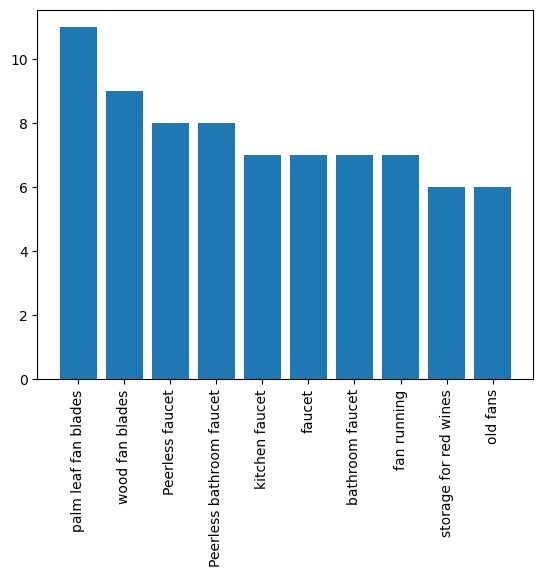

In [95]:
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.show()